In [1]:
import pandas as pd
data = pd.read_csv('./GoodsOrder.csv',encoding='gbk')
types = pd.read_csv('./GoodsTypes.csv',encoding='gbk')

In [2]:
data.head()

,id,Goods
0,1,柑橘类水果
1,1,人造黄油
2,1,即食汤
3,1,半成品面包
4,2,咖啡


In [3]:
types.head()

,Goods,Types
0,白饭,熟食
1,白酒,酒精饮料
2,白兰地,酒精饮料
3,白面包,西点
4,半成品面包,西点


# 探索性分析

In [4]:
import numpy as np

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43285 entries, 0 to 43284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      43285 non-null  int64 
 1   Goods   43285 non-null  object
dtypes: int64(1), object(1)
memory usage: 676.5+ KB


In [6]:
data['id'].describe()

count    43285.000000
mean      4907.985723
std       2843.314189
min          1.000000
25%       2455.000000
50%       4826.000000
75%       7381.000000
max       9835.000000
Name: id, dtype: float64

# 绘制条形图分析热销商品

## 销量排行前10 的商品的销量及其占比

In [7]:
group = data.groupby(['Goods']).count().reset_index()

In [8]:
sort = group.sort_values('id',ascending=False)

In [9]:
print('销量排行前10 的商品的销量：\n',sort[:10])

销量排行前10 的商品的销量：
      Goods    id
6     全脂牛奶  2513
7     其他蔬菜  1903
154    面包卷  1809
133    苏打水  1715
149     酸奶  1372
98     瓶装水  1087
69   根茎类蔬菜  1072
84    热带水果  1032
142    购物袋   969
159     香肠   924


In [10]:
data_nums = data.shape[0]

In [11]:
for index,row in sort[:10].iterrows():
    print(row['Goods'],row['id'],row['id']/data_nums)

全脂牛奶 2513 0.058057063647914985
其他蔬菜 1903 0.043964421855146124
面包卷 1809 0.04179276885757191
苏打水 1715 0.03962111585999769
酸奶 1372 0.03169689268799815
瓶装水 1087 0.025112625620884833
根茎类蔬菜 1072 0.0247660852489315
热带水果 1032 0.02384197759038928
购物袋 969 0.022386508028185283
香肠 924 0.021346886912325287


## 绘制条形图展示销量排行前10的商品的销量

In [12]:
import matplotlib.pyplot as plt
# 设置字体
plt.rcParams['font.sans-serif']=['SimHei']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  fig.canvas.print_figure(bytes

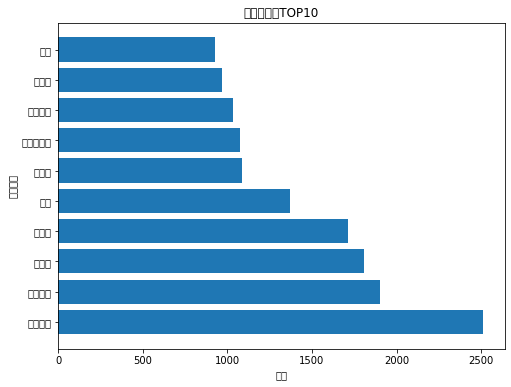

In [13]:
x = sort[:10]['Goods']
y = sort[:10]['id']
plt.figure(figsize=(8,6))
# plt.rc('font',size=12)
plt.barh(x,y)
# plt.rcParams['font.sans-serif'] = 'SimHei'
plt.xlabel('销量')
plt.ylabel('商品名称')
plt.title('商品的销量TOP10')
plt.show()

##  绘制饼图分析商品结构

In [14]:
group1 = data.groupby(['Goods']).count().reset_index()
sort = group1.sort_values('id',ascending=False).reset_index()
data_nums = data.shape[0]
del sort['index']

In [15]:
sort_links = pd.merge(sort,types)#根据type合并两个DataFrame

In [16]:
# 根据类别求和，求每个商品类别的总量，排序
sort_link = sort_links.groupby(['Types']).sum().reset_index()
sort_link = sort_link.sort_values('id',ascending=False).reset_index()
del sort_link['index']

In [17]:
# 求百分比，然后更换列名，最后输出到文件
sort_link['count']=sort_link.apply(lambda line:line['id']/data_nums,axis=1)
sort_link.rename(columns={'count':'percent'},inplace=True)
print('各类别商品的销量及其占比:\n',sort_link)
outfile = './precent.csv'
sort_link.to_csv(outfile,index=False,header=True,encoding='gbk')


各类别商品的销量及其占比:
    Types    id   percent
0  非酒精饮料  7594  0.175442
1     西点  7192  0.166155
2     果蔬  7146  0.165092
3   米粮调料  5185  0.119787
4     百货  5141  0.118771
5     肉类  4870  0.112510
6   酒精饮料  2287  0.052836
7    食品类  1870  0.043202
8     零食  1459  0.033707
9     熟食   541  0.012499


### 绘制饼图展示每一类商品销量占比

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from current font.
  fig.canvas.print_figure(bytes

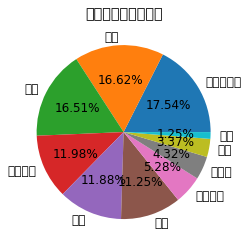

In [18]:
data1 = sort_link['percent']
labels = sort_link['Types']
plt.rc('font',size=12)
plt.pie(data1,labels=labels,autopct='%1.2f%%')
plt.title('各类别商品销量占比')
plt.show()

## 查看销量第一的非酒精饮料的内部商品结构，绘制饼图显示其销量占比情况

In [19]:
# 先筛选非酒精饮料类别的商品，求百分比
selected = sort_links.loc[sort_links['Types']=='非酒精饮料']

In [20]:
child_nums = selected['id'].sum()#对所有的非酒精饮料进行求和
selected['child_percent'] = selected.apply(lambda line:line['id']/child_nums,axis=1)#求百分比
selected.rename(columns={'id':'count'},inplace=True)
print('非酒精饮料的内部商品的销量及其占比:\n',selected)
outfile2 = './child_percent.csv'
sort_link.to_csv(outfile2,index=False,header=True,encoding='gbk')


非酒精饮料的内部商品的销量及其占比:
         Goods  count  Types  child_percent
0        全脂牛奶   2513  非酒精饮料       0.330919
3         苏打水   1715  非酒精饮料       0.225836
5         瓶装水   1087  非酒精饮料       0.143139
16     水果/蔬菜汁    711  非酒精饮料       0.093627
22         咖啡    571  非酒精饮料       0.075191
38   超高温杀菌的牛奶    329  非酒精饮料       0.043324
45       其他饮料    279  非酒精饮料       0.036740
51       一般饮料    256  非酒精饮料       0.033711
101      速溶咖啡     73  非酒精饮料       0.009613
125         茶     38  非酒精饮料       0.005004
143      可可饮料     22  非酒精饮料       0.002897


/tmp/ipykernel_36542/896555734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['child_percent'] = selected.apply(lambda line:line['id']/child_nums,axis=1)#求百分比
/tmp/ipykernel_36542/896555734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected.rename(columns={'id':'count'},inplace=True)


### 绘制饼图展示

/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37202 (\N{CJK UNIFIED IDEOGRAPH-9152}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39278 (\N{CJK UNIFIED IDEOGRAPH-996E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from current font.
  fig.c

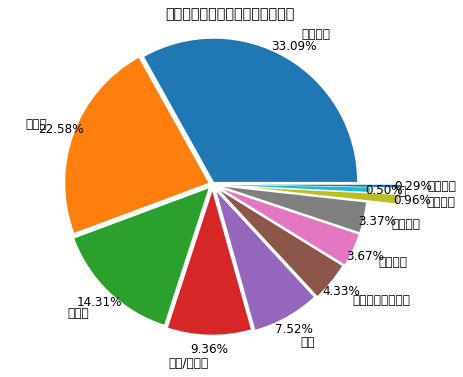

In [21]:
data2 = selected['child_percent']
labels = selected['Goods']
plt.figure(figsize=(8,6))
explode = (0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.08,0.3,0.1,0.3)#设置每一块分割出的间隙大小
plt.pie(data2,explode=explode,labels=labels,autopct='%1.2f%%',pctdistance=1.1,labeldistance=1.2)
plt.title('非酒精饮料内部各商品的销量占比')
plt.axis('equal')
plt.show()

# 数据预处理

In [22]:
# 根据id 对 Goods 列合并，使用','将各商品隔开
data['Goods'] = data['Goods'].apply(lambda x:','+x)
data = data.groupby('id').sum().reset_index()

# 对合并的商品列转换数据格式
data['Goods'] = data['Goods'].apply(lambda x:[x[1:]])
data_list = list(data['Goods'])



In [23]:
# 分割商品名称，每个商品为独立元素
data_translation = []
for i in data_list:
    p = i[0].split(',')
    data_translation.append(p)
    
print('数据转换结果的前5各元素：\n',data_translation[:5])

数据转换结果的前5各元素：
 [['柑橘类水果', '人造黄油', '即食汤', '半成品面包'], ['咖啡', '热带水果', '酸奶'], ['全脂牛奶'], ['奶油乳酪', '肉泥', '仁果类水果', '酸奶'], ['炼乳', '长面包', '其他蔬菜', '全脂牛奶']]


# 构建模型--关联规则分析

In [30]:
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori

In [31]:
te = TransactionEncoder()
te_ary = te.fit(data_translation).transform(data_translation)
df = pd.DataFrame(te_ary,columns=te.columns_)

In [32]:
 freq = apriori(df,min_support=0.01,use_colnames=True)

In [33]:
freq

,support,itemsets
0,0.019227,(一般清洁剂)
1,0.025839,(一般肉类)
2,0.026043,(一般饮料)
3,0.058596,(人造黄油)
4,0.075687,(仁果类水果)
...,...,...
328,0.012920,"(酸奶, 根茎类蔬菜, 其他蔬菜)"
329,0.012208,"(根茎类蔬菜, 面包卷, 其他蔬菜)"
330,0.012309,"(酸奶, 热带水果, 其他蔬菜)"
331,0.010173,"(酸奶, 酸奶油, 其他蔬菜)"


In [39]:
outfile3 = './freq.csv'
freq.to_csv(outfile3,index=False,header=True,encoding='gbk')

In [36]:
from mlxtend.frequent_patterns import association_rules
# 计算关联规则
result = association_rules(freq,metric='confidence',min_threshold=0.6)